# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/DS3001/visualization


Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 7.47 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [5]:
import pandas as pd
airbnb = pd.read_csv('airbnb_hw.csv')
price = airbnb['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce')
airbnb['Price'] = price
del price

In [9]:
print(airbnb.shape)
airbnb.head(10)


(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


In [10]:
airbnb.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [12]:

pd.crosstab(airbnb['Property Type'], airbnb['Room Type'])


Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


First off, the most common catagorys by far are house and apartment. The majority of the apartments are for the whole property, whereas the majority of the houses are available for a private room within the house.

<Axes: xlabel='Price', ylabel='Count'>

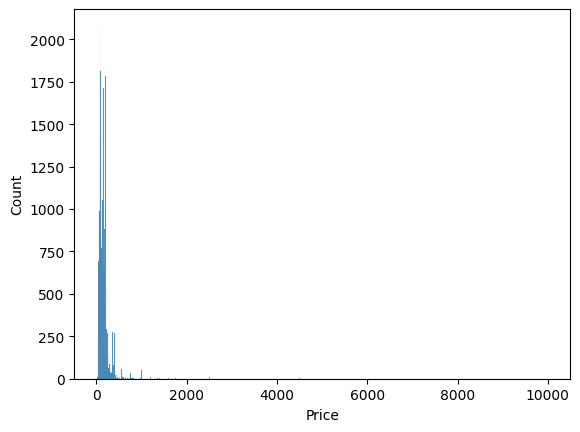

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.histplot(data=airbnb,x='Price')





<Axes: xlabel='Price', ylabel='Density'>

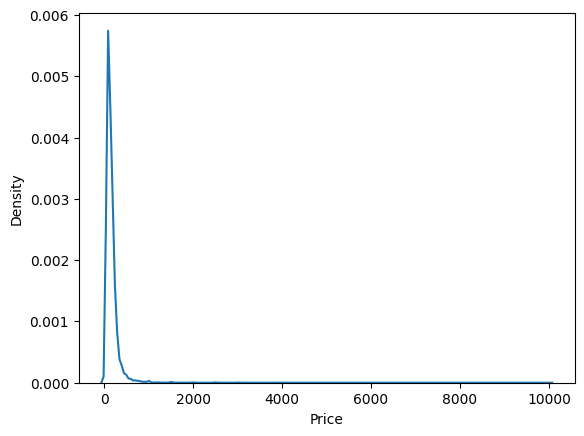

In [22]:
sns.kdeplot(data=airbnb,x='Price')



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price'>

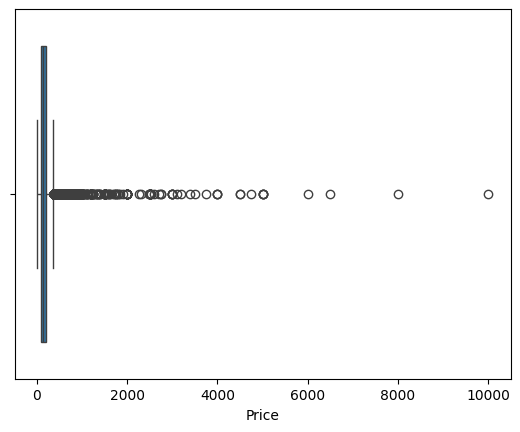

In [23]:
sns.boxplot(data=airbnb,x='Price')



In [24]:
airbnb['Price'].describe()



,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


Here, the data are scaled pretty poorly. As you can see in the previous graph, there are many upward outliers outside the quartile range. Therefore, it is necessary to adjust how the data is plotted with a log function.

In [25]:
airbnb['Price_log'] = np.log(airbnb['Price'])



<Axes: xlabel='Price_log', ylabel='Count'>

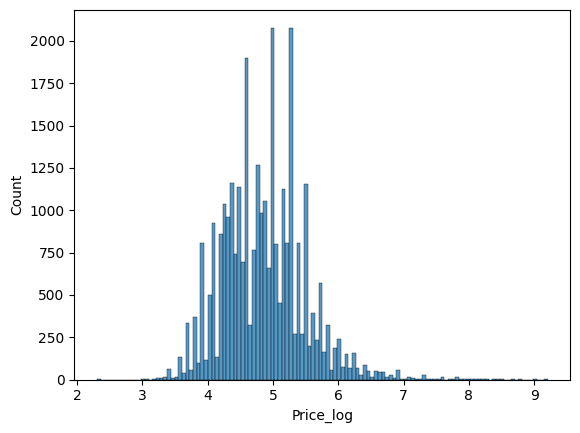

In [26]:
sns.histplot(data=airbnb,x='Price_log')



<Axes: xlabel='Price_log', ylabel='Density'>

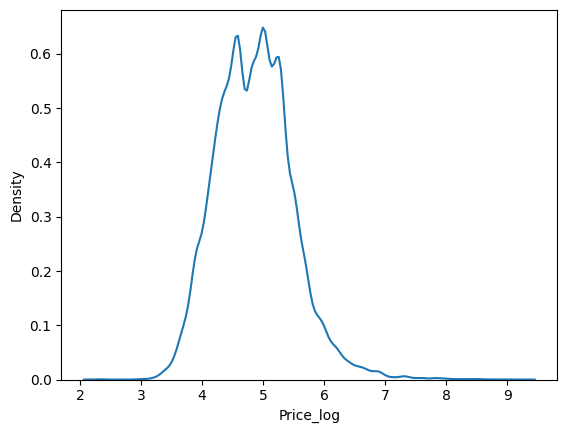

In [27]:
sns.kdeplot(data=airbnb,x='Price_log')



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price_log'>

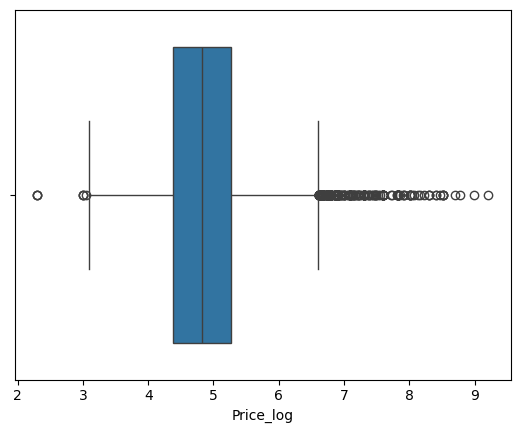

In [28]:
sns.boxplot(data=airbnb,x='Price_log')



In [29]:
airbnb['Price_log'].describe()

,Price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


<Axes: xlabel='Beds', ylabel='Price_log'>

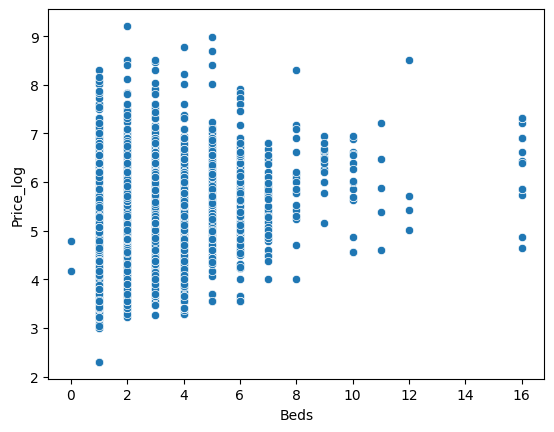

In [30]:
sns.scatterplot( data=airbnb, x='Beds', y='Price_log')

In [32]:
airbnb.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

Generally we see the price increase as the number of beds increases. This makes sense as the more beds are offered typically mean more people and more space. Also, the standard deviation also increases until about 6. However, both of these statistics are not clear after 6 beds likley because of high outliers.

<Axes: xlabel='Beds', ylabel='Price_log'>

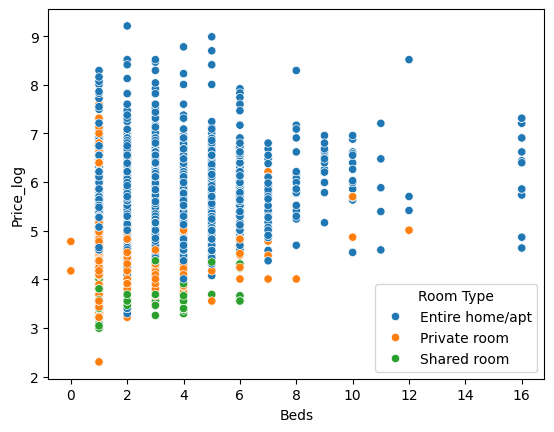

In [33]:
sns.scatterplot(data=airbnb,x='Beds',y='Price_log',hue='Room Type')

In [34]:
variable = 'Price'
group = 'Room Type'
airbnb.loc[:,[group,variable]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

The room type and property type with the highest price are are whole home/apt. The lowest are private room and shared room. The highest standard dev. for type is far an away the entire room/apt. This makes sense due to the high outliers and variable apt/house size. Median is the more reliable measure of central tendancy as the high outliers drag the mean out of poisition.

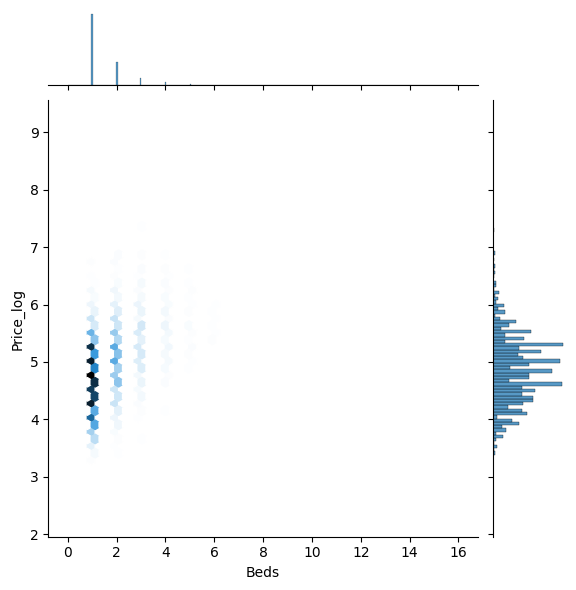

In [35]:

sns.jointplot(data=airbnb, x='Beds', y='Price_log', kind='hex')


As we can see in this plot, host of all properties have between 1 to 4 beds. Additionally, as it corrsponds to the log scale, the majority of the prices are between 40 and 400dollars. The firsts graphs before the log functions were abnormal and skewing results.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [38]:
data = pd.read_csv("crop_yield.csv")
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


The data dictionary is interesting. There are no missing or imcomplete values in the dataset so it is not documented how these are handeled. However, it does provide the data type for each variable, with 4 strings, 4 decimals, and 2 booleans. I think this data dictionary was light but affective, and is aided by there not being too many missing or null values.

In [45]:

print(data[['Crop',  'Yield_tons_per_hectare', 'Temperature_Celsius' ]].isnull().sum())

data['Yield_tons_per_hectare'] = pd.to_numeric(data['Yield_tons_per_hectare'], errors='coerce')


data['Crop'] = data['Crop'].str.lower().str.capitalize()


Crop                      0
Yield_tons_per_hectare    0
Temperature_Celsius       0
dtype: int64


This is some preliminary data cleaning. I ahve chosen to see how tempperature affects yield in different types of crops from this agriculture dataset. I noticed that some crops had capitalized and uncapitalized first letters for the same crop, so I converted them all to capital. I also checked for missing values in my variables of interest, which all came back as 0 (no missing values).


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


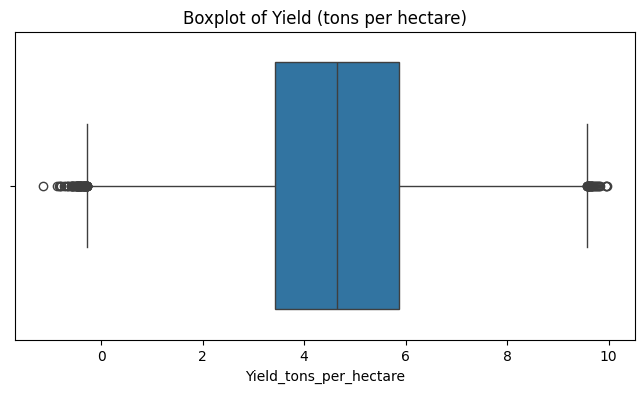

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


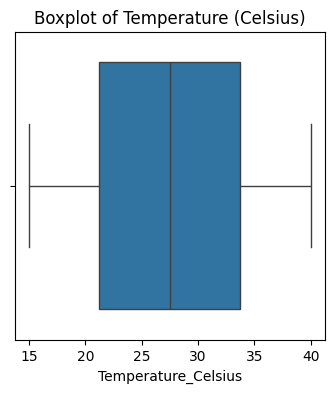

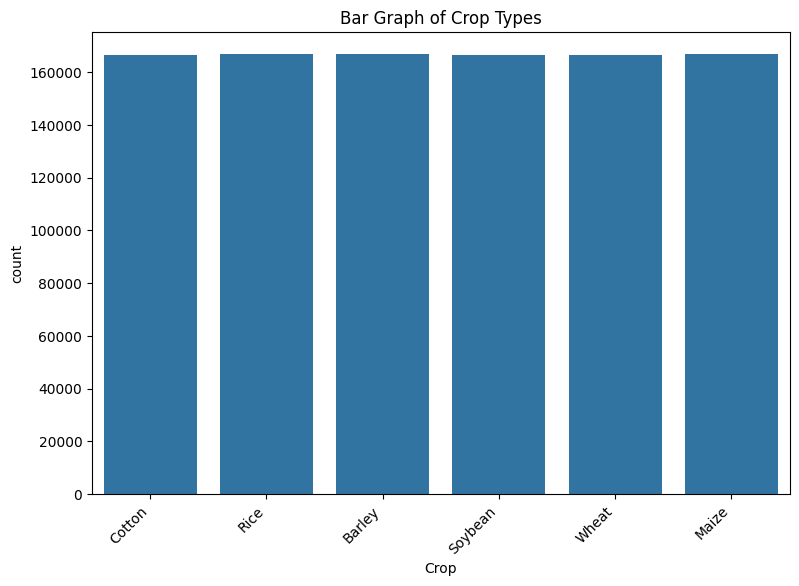

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Yield_tons_per_hectare'])
plt.title('Boxplot of Yield (tons per hectare)')
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(x=data['Temperature_Celsius'])
plt.title('Boxplot of Temperature (Celsius)')
plt.show()

plt.figure(figsize=(9, 6))
sns.countplot(x=data['Crop'])
plt.title('Bar Graph of Crop Types')
plt.xticks(rotation=45, ha='right')
plt.show()




In [54]:

neg_yields = data[data['Yield_tons_per_hectare'] < 0]

if not neg_yields.empty:
  print("There are negative values in the  variable.")


There are negative values in the  variable.


After discovering there were negative yeilds in the variable, I removed any negetive number as additional cleaning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


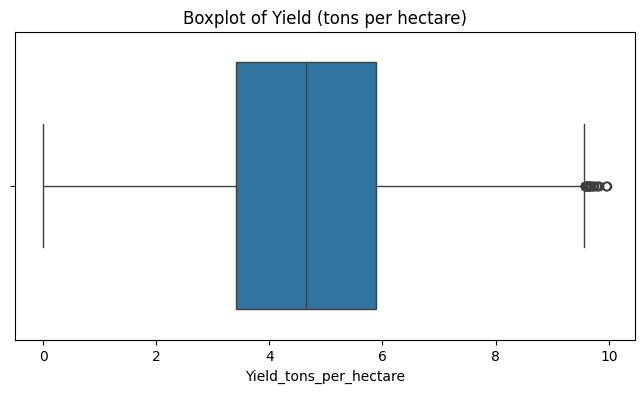

In [56]:

data = data[data['Yield_tons_per_hectare'] >= 0]
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Yield_tons_per_hectare'])
plt.title('Boxplot of Yield (tons per hectare)')
plt.show()

Now, there are no low outliers, and there are some high outliers but they are very close to the upper bound of the boxplot. Also, in the other plots, there are no outliers and all of the crop types are the same number of counts.

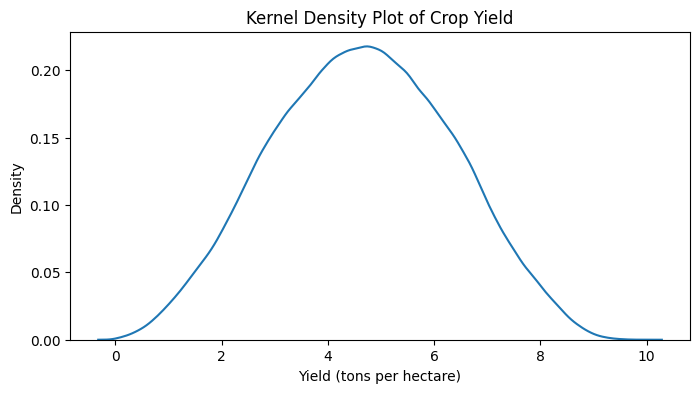

In [58]:

plt.figure(figsize=(8, 4))
sns.kdeplot(data=data, x='Yield_tons_per_hectare')
plt.title('Kernel Density Plot of Crop Yield')
plt.xlabel('Yield (tons per hectare)')
plt.show()




This kernel density plot seems fairly standard. The yield of the crops in this dataset tend to center around a little under 5 tons per acre. The sides look fairly semetrical with little skew, suggesting a fairly even distribution of crop yield throughout the dataset. Therefore does not require rescaling.

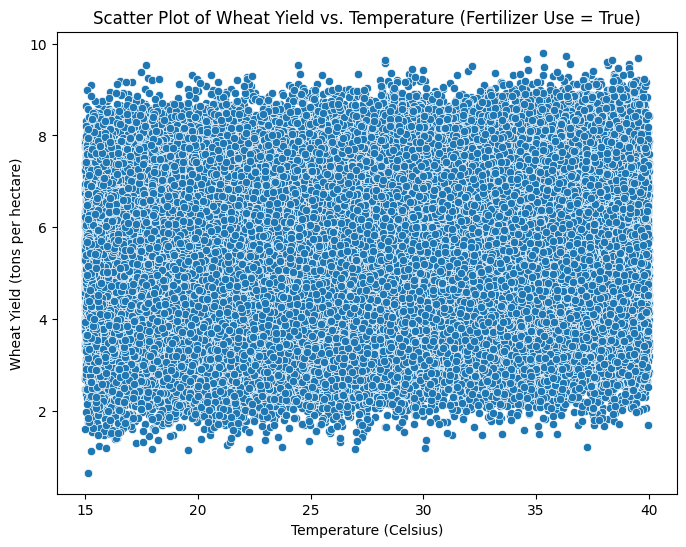

In [66]:

data_filtered = data[(data['Crop'] == 'Wheat') & (data['Fertilizer_Used'] == True)]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature_Celsius', y='Yield_tons_per_hectare', data=data_filtered)
plt.title('Scatter Plot of Wheat Yield vs. Temperature (Fertilizer Use = True)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Wheat Yield (tons per hectare)')
plt.show()




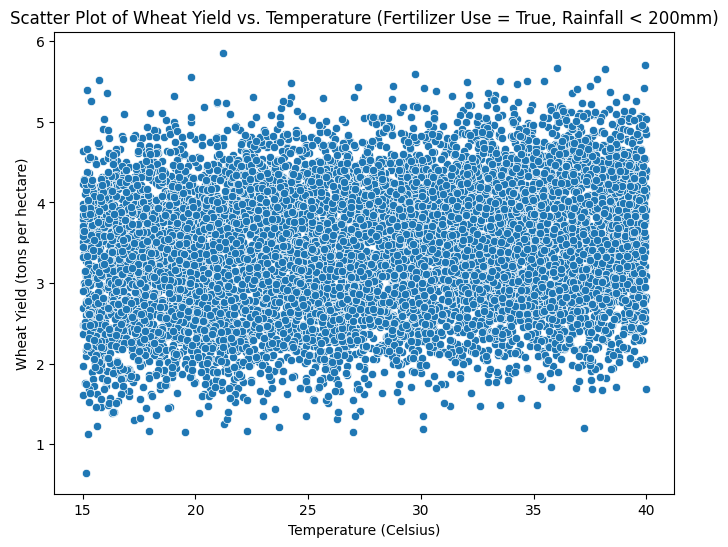

In [72]:

data_filtered = data[(data['Crop'] == 'Wheat') & (data['Fertilizer_Used'] == True) & (data['Rainfall_mm'] < 200)]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature_Celsius', y='Yield_tons_per_hectare', data=data_filtered)
plt.title('Scatter Plot of Wheat Yield vs. Temperature (Fertilizer Use = True, Rainfall < 200mm)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Wheat Yield (tons per hectare)')
plt.show()


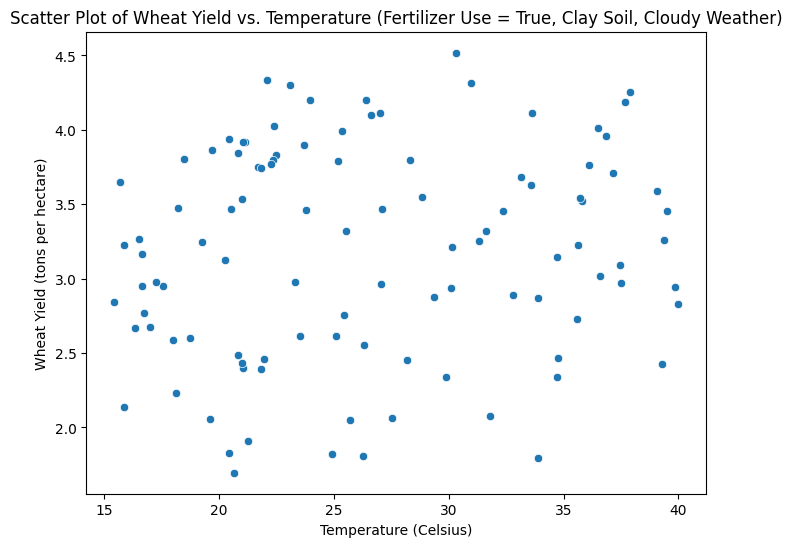

In [75]:

data_filtered = data[(data['Crop'] == 'Wheat') & (data['Fertilizer_Used'] == True) & (data['Soil_Type'] == 'Clay') & (data['Weather_Condition'] == 'Cloudy')& (data['Rainfall_mm'] < 120)]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature_Celsius', y='Yield_tons_per_hectare', data=data_filtered)
plt.title('Scatter Plot of Wheat Yield vs. Temperature (Fertilizer Use = True, Clay Soil, Cloudy Weather)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Wheat Yield (tons per hectare)')
plt.show()


Essentially, there is a limited relationship between crop production and temperature in a general sense. Whaat I tried to do is to go smaller and smaller in my scale of analysis by adding other factors (such as rainfall, weather, etc.) to see if I could find a relationship. Unfortunatly there is no obvious relationship to be found. In the future, this would be an interesting dataset to keep explore but is VERY big (1,000,000 rows!!)

In [76]:
data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Yield_tons_per_hectare_log
count,999769.000000,999769.000000,999769.000000,999769.000000,999769.000000
mean,550.077823,27.506079,104.495141,4.650592,1.680285
std,259.804329,7.220488,25.953328,1.695166,0.335952
min,100.000896,15.000034,60.000000,0.000411,0.000411
25%,325.062906,21.256078,82.000000,3.418669,1.485838
50%,550.229205,27.509509,104.000000,4.652333,1.732068
75%,774.797949,33.754459,127.000000,5.879576,1.928557
max,999.998098,39.999997,149.000000,9.963372,2.394560


I see some interesting trends here. Most of the data is fairly well behaved, which can be seen in the boxplots made previously. For example, the days to harvest are between 60 and 149. I do this it is a little suspicious that the max rainfall is 999.99, which would make the data easier to work with since there would be no commas. I also this it is important to recognize that the "yeild_tons_per_hectare" numbers were origionally negative and not are positive, with the min being .000411, which in all is worth investigating what a "negative" yield means (did not mention in data dictionary)